In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv(r"C:\Users\merve\Desktop\tavsanliHavaKalitesi.csv")
data.head()

,PM10 ( µg/m3 ),SO2 ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),PM 2.5 ( µg/m3 ),kalite
0,18.98,40.06,14.24,32.99,10.74,1
1,27.72,49.80,14.76,32.97,17.53,0
2,31.96,65.48,14.59,36.73,18.64,0
3,8.09,36.59,15.84,28.18,3.60,1
4,17.33,48.34,14.56,37.10,9.28,0


In [39]:
X = data.drop('kalite', axis=1)
Y = data['kalite']

In [40]:
#eğitim ve test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [42]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [43]:
prediction = classifier.predict(X_test)
import numpy as np
correct = np.sum(prediction ==  Y_test)
print ('Test Accuracy: ', correct/float(Y_test.shape[0])*100.0, '%')

Test Accuracy:  97.57575757575758 %


In [44]:
#Performans Ölçütleri
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))
print("RMSE:")
print(np.sqrt(metrics.mean_squared_error(Y_test, prediction)))


[[96  1]
 [ 3 65]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        97
           1       0.98      0.96      0.97        68

    accuracy                           0.98       165
   macro avg       0.98      0.97      0.97       165
weighted avg       0.98      0.98      0.98       165

RMSE:
0.1556997888323046


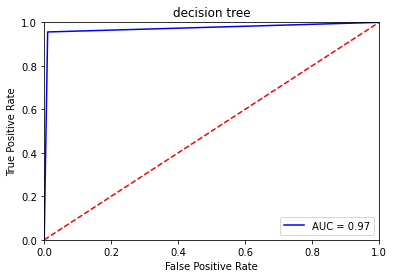

In [45]:
#ROC 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('decision tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()